# Overall code framework

In [1]:
import numpy as np
import pandas as pd
import seaborn

from functions import *

from sklearn.datasets import make_blobs, make_hastie_10_2, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# n_samples = 1000

knn = KNeighborsClassifier(n_neighbors=1)
tree = DecisionTreeClassifier(max_depth=1)
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()

models = {
    '1-NN': knn,
    'Stump': tree,
    'LDA': lda,
    'NB': nb
}

random_state = None

meta dataset generator

In [28]:
folder = 'data/datasets_openml'
ids = get_ids(folder)
metaX = []
metay = []
for id in ids:
    print(f"ID: {id}")
    X, y = load_dataset(folder, id)
    metafeatures = extract_metafeatures(X, y)
    metaX.append(metafeatures)
    metalabel = get_metalabel(X, y, models)
    metay.append(metalabel)

metaX = np.stack(metaX)
metay = np.stack(metay)

save_folder = 'data/datasets_meta'
np.save(f'{save_folder}/openmldata.npy', metaX)
np.save(f'{save_folder}/openmllabel.npy', metay)
np.save('openmlids.npy', np.asarray(ids))


expertise space distribution

C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_s

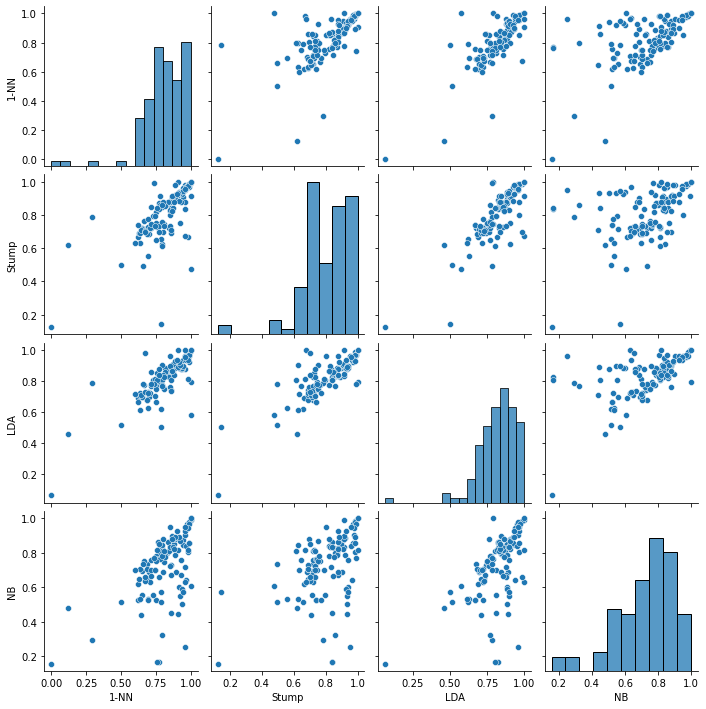

In [4]:
import seaborn

ids = np.load('data/meta_ids/openmlids.npy')

df = compute_expertise_space(models, 'data/datasets_openml', ids)
seaborn.pairplot(df).savefig(f'openml-pairwise.png')

In [5]:
uniformity_test(df.to_numpy())

1.3659824158120291e-283

C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\liak\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_s

NameError: name 'uniformity_score' is not defined

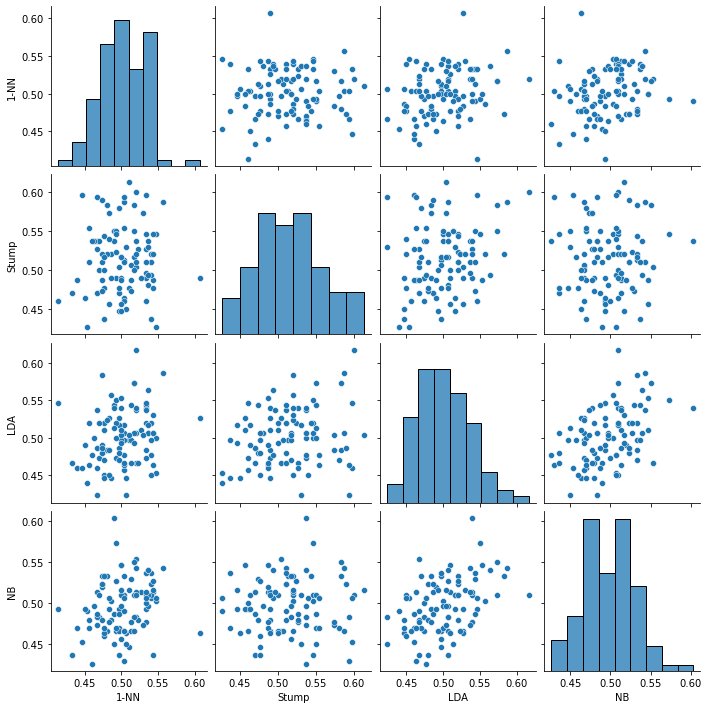

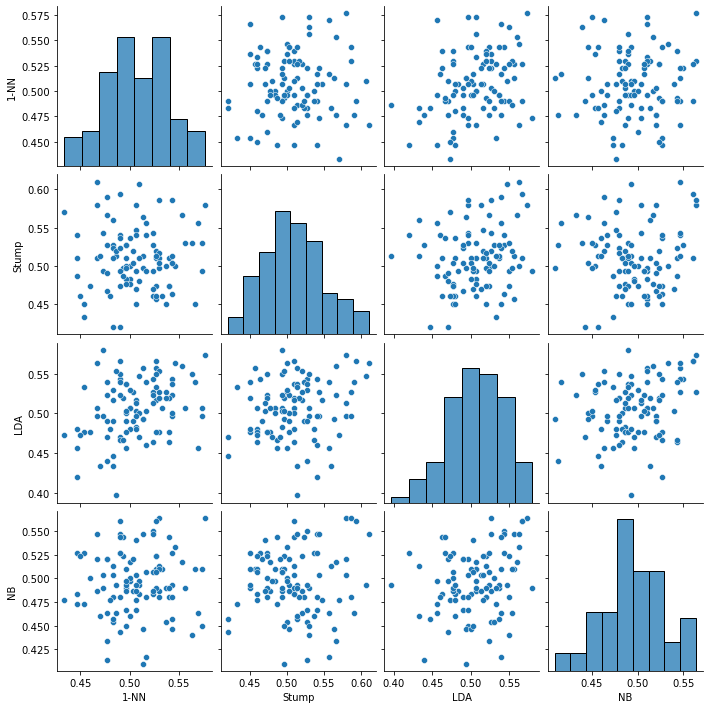

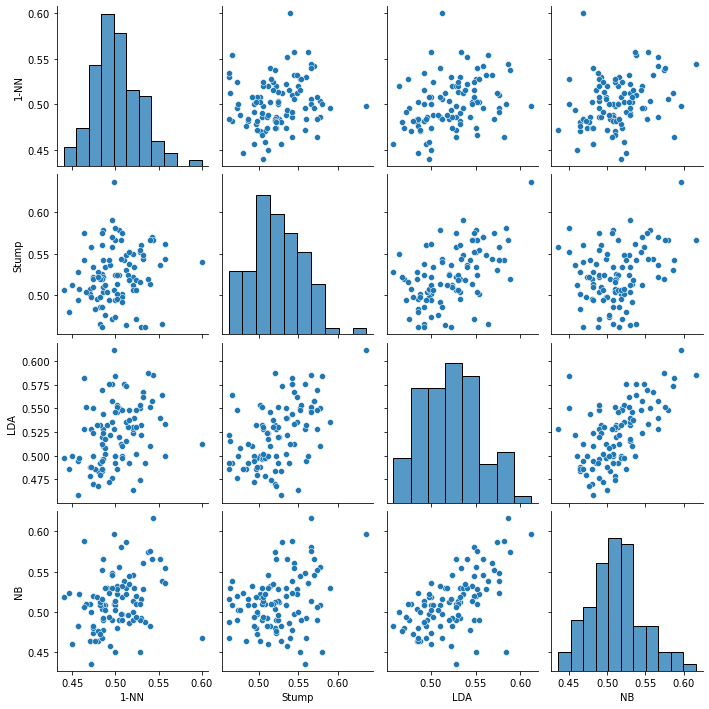

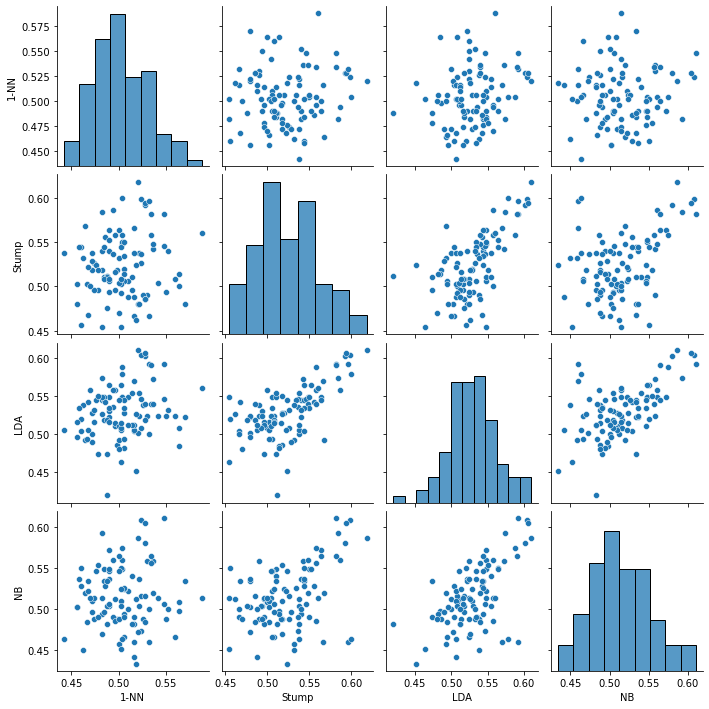

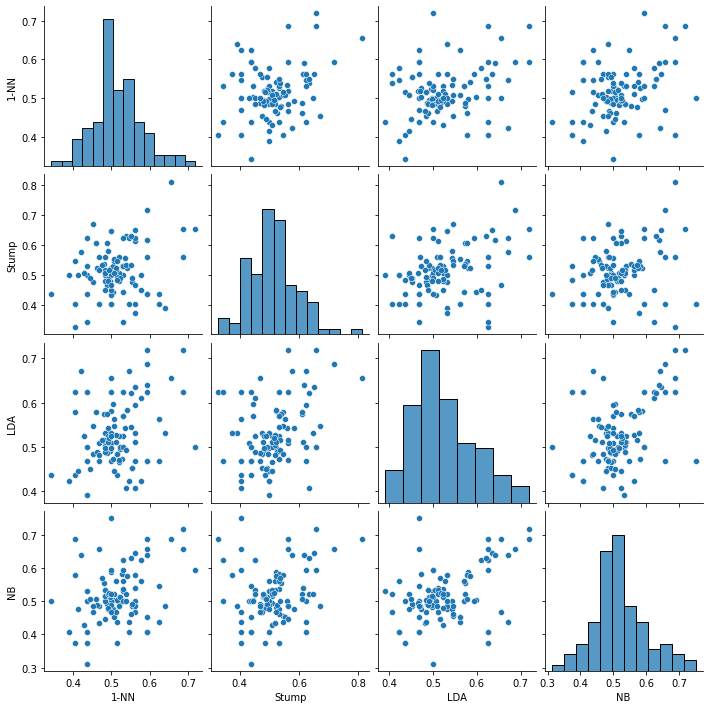

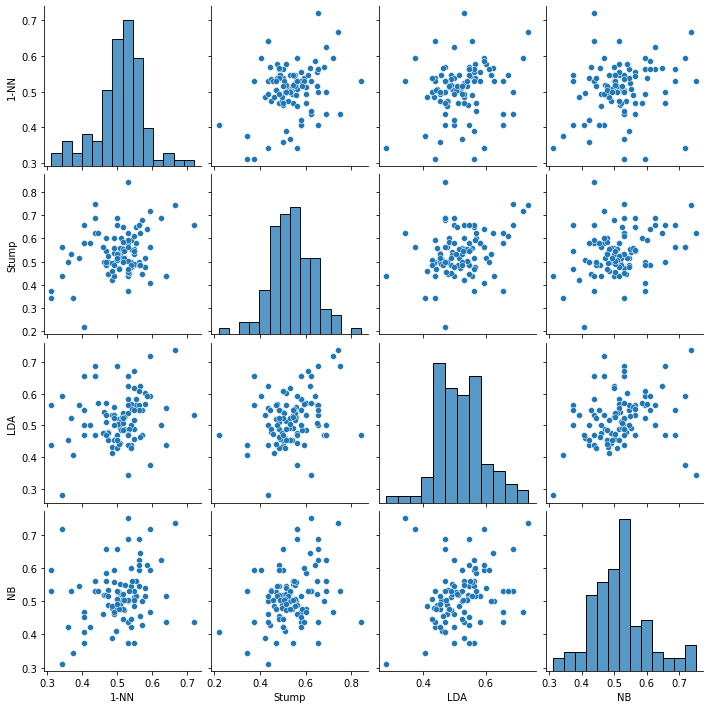

In [7]:
import seaborn

np_choices = [0, 1, 2]
c_choices = [0, 1]

uniformity_scores = np.zeros((3, 2))
for p in np_choices:
    for c in c_choices:
        folder = f'data/datasets_artificial/{p}{c}'
        df = compute_expertise_space(models, folder)
        seaborn.pairplot(df).savefig(f'{p}{c}-pairwise.png')
        uniformity_scores[p, c] = uniformity_test(df.to_numpy())


In [8]:
uniformity_scores

array([[3.31837078e-03, 1.78894356e-02],
       [3.04839664e-17, 5.50271620e-22],
       [3.41997216e-05, 8.01211213e-08]])

meta learner

In [14]:
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

folder = 'data/datasets_meta'
folds = KFold(n_splits=10)
X, y = load_dataset(folder, 'openml')

uniformity_scores = []
meta_accuracy = []

for train, test in folds.split(X):
    allnn = KNeighborsClassifier(n_neighbors=train.size, weights='distance')
    allnn.fit(X[train], y[train])
    predictions = allnn.predict(X[test])
    
    uniformity_score = uniformity_test(expertise[train])
    uniformity_scores.append(uniformity_score)
    accuracy = np.sum(predictions == y[test]) / y.size
    meta_accuracy.append(accuracy)

    print(f"Uniformity: {uniformity_score}, accuracy: {accuracy}")

Uniformity: 2.1929389114518524e-257, accuracy: 0.008403361344537815
Uniformity: 2.1929389114518524e-257, accuracy: 0.025210084033613446
Uniformity: 2.1929389114518524e-257, accuracy: 0.025210084033613446
Uniformity: 6.170458609839146e-275, accuracy: 0.03361344537815126
Uniformity: 1.6275533231101346e-275, accuracy: 0.025210084033613446
Uniformity: 2.1929389114518524e-257, accuracy: 0.04201680672268908
Uniformity: 4.174574480242433e-263, accuracy: 0.05042016806722689
Uniformity: 6.693820396133565e-276, accuracy: 0.03361344537815126
Uniformity: 5.893669679029362e-269, accuracy: 0.03361344537815126
Uniformity: 1.5008593630685973e-260, accuracy: 0.0


# Actions

Inverting on separate datasets

In [59]:
for dataset_id in range(100):
    plt.figure()
    for name, model in models.items():
        acc = []
        X, y = load_dataset(dataset_id)

        # X, y = make_classification(n_samples=n_samples, random_state=random_state)
        
        # X, y = make_hastie_10_2(n_samples=n_samples, random_state=random_state)
        # y = np.where(y == -1, 0, y)
        
        # X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=1, random_state=random_state)

        # X, y = make_blobs(n_samples=n_samples, n_features=10, centers=1, cluster_std=1, random_state=random_state)
        # y = np.concatenate((np.zeros(n_samples//2), np.ones(n_samples//2)))
        
        for i in range(30):
            accuracy, errors = evaluate(X, y, model)
            acc.append(accuracy)
            # a means >= 15 invert random, b means < 15 invert random
            if i >= 15:
                X, y = invert_random(X, y)
            else:
                X, y = invert_errors(X, y, model)

        plt.plot(acc, label=name)


    plt.xlabel('Action iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    # plt.show()
    plt.savefig(f'a{dataset_id}.png')

Inverting off a single dataset

In [57]:
# X, y = make_classification(n_samples=n_samples, random_state=random_state, class_sep=1.0)

X, y = make_hastie_10_2(n_samples=n_samples, random_state=random_state)
y = np.where(y == -1, 0, y)

# X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=1, random_state=random_state)

# X, y = make_blobs(n_samples=n_samples, n_features=10, centers=1, cluster_std=1, random_state=random_state)
# y = np.concatenate((np.zeros(n_samples//2), np.ones(n_samples//2)))

acc = {name:[] for name in models}
for i in range(30):
    print(np.unique(y, return_counts=True)[1])
    for name, model in models.items():
        accuracy, errors = evaluate(X, y, model)
        acc[name].append(accuracy)
    if i >= 15:
        X, y = invert_random(X, y)
    else:
        # list(models.keys())[i % 4]
        X, y = invert_errors(X, y, models[list(models.keys())[i % 4]])

for name, values in acc.items():
    plt.plot(values, label=name)

plt.xlabel('Action iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()